# 5. 데이터 전처리 응용

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [4]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [5]:
df.shape

(6362620, 11)

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
# check data types
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [14]:
# numeric features
numeric_features = ['step', 'amount',
                    'oldbalanceOrg', 'newbalanceOrig',
                    'oldbalanceDest', 'newbalanceDest']

# categorical features
categorical_features = ['type', 'nameOrig', 'nameDest']

### Missing data 체크

In [15]:
df.isna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# Missing values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [16]:
df = df.dropna()

### Correlation

In [17]:
# Correlation between x and y
y_column = 'isFraud'
x_column = 'type'
df['isFraud'].mean() # -> 0.13%

0.001290820448180152

In [20]:
display(pd.crosstab(index=df[x_column], columns=df[y_column], normalize='columns'))

isFraud,0,1
type,,
CASH_IN,0.220207,0.000000
CASH_OUT,0.351470,0.501157
DEBIT,0.006520,0.000000
PAYMENT,0.338583,0.000000
TRANSFER,0.083220,0.498843


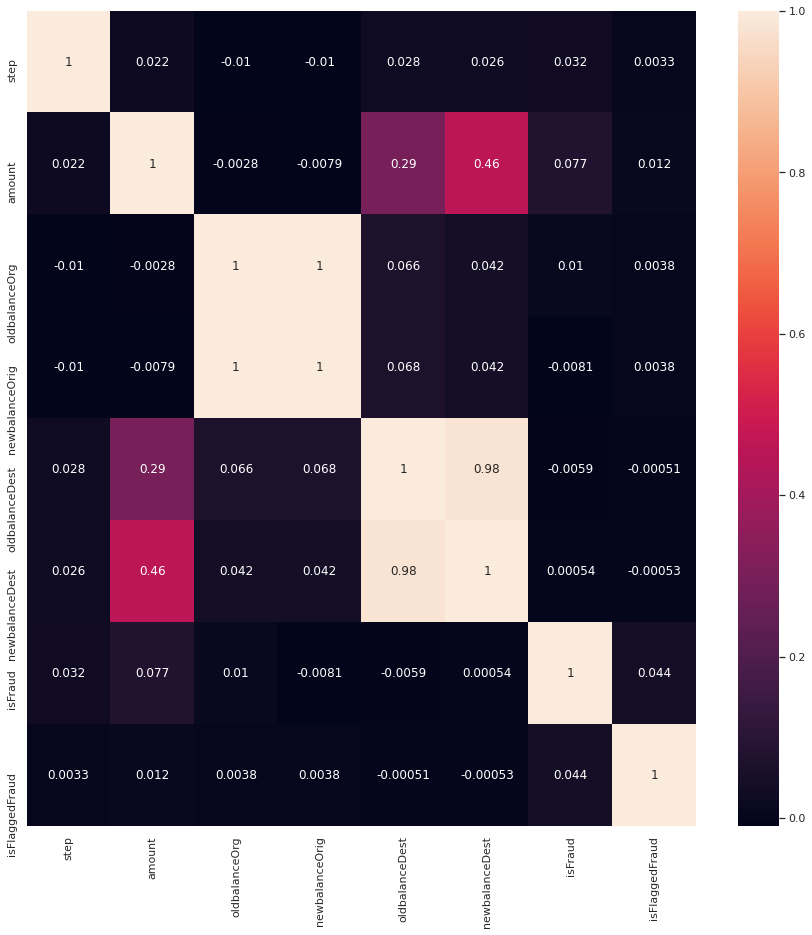

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
# sn.set(rc = {'figure.figsize':(15,15)})
plt.show()

### Histogram

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


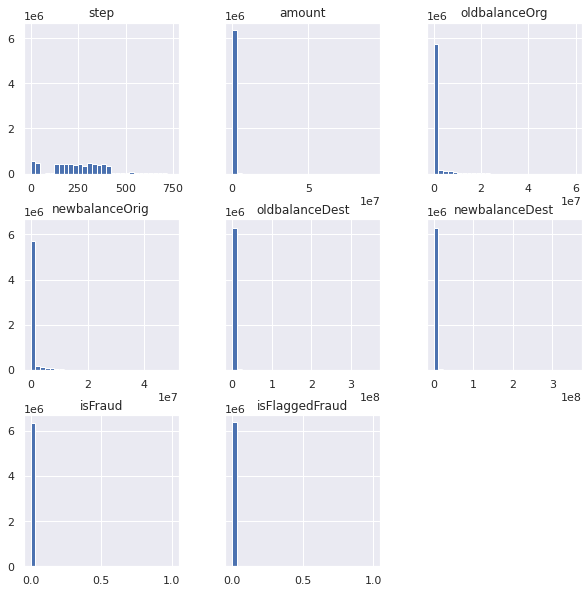

In [41]:
# Histograms for each numeric features
display(df.describe())
hist = df.hist(bins=30, sharey=True, figsize=(10, 10))

### 타겟변수 값별 히스토그램

step


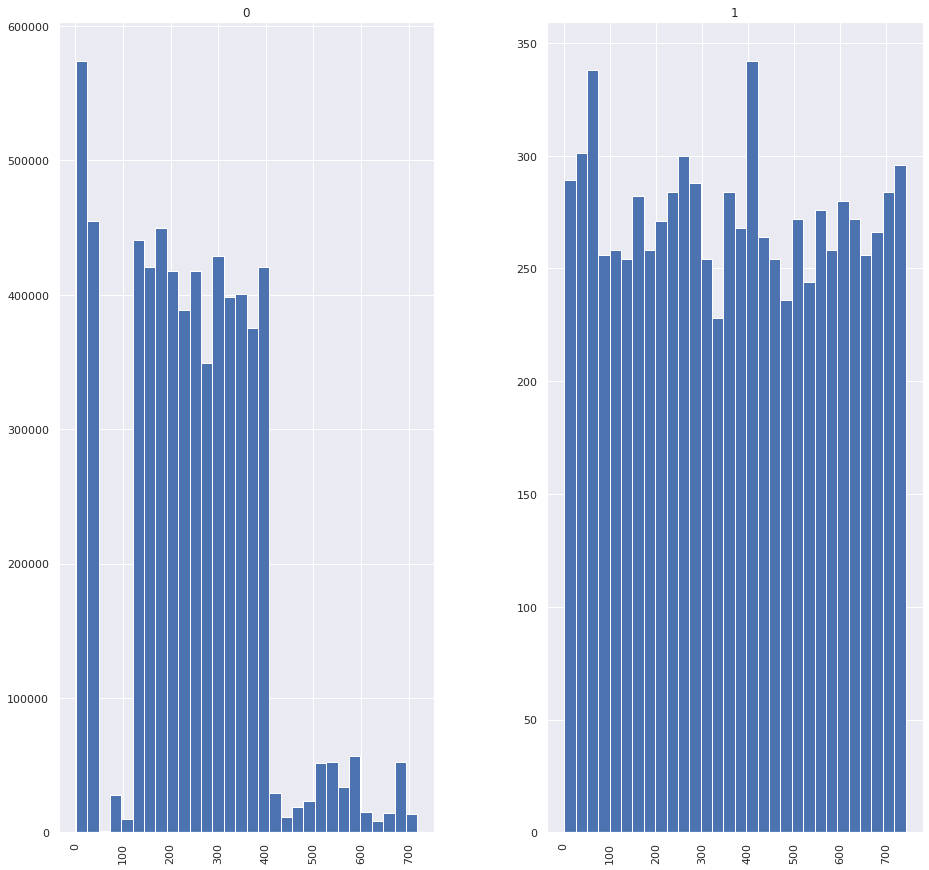

amount


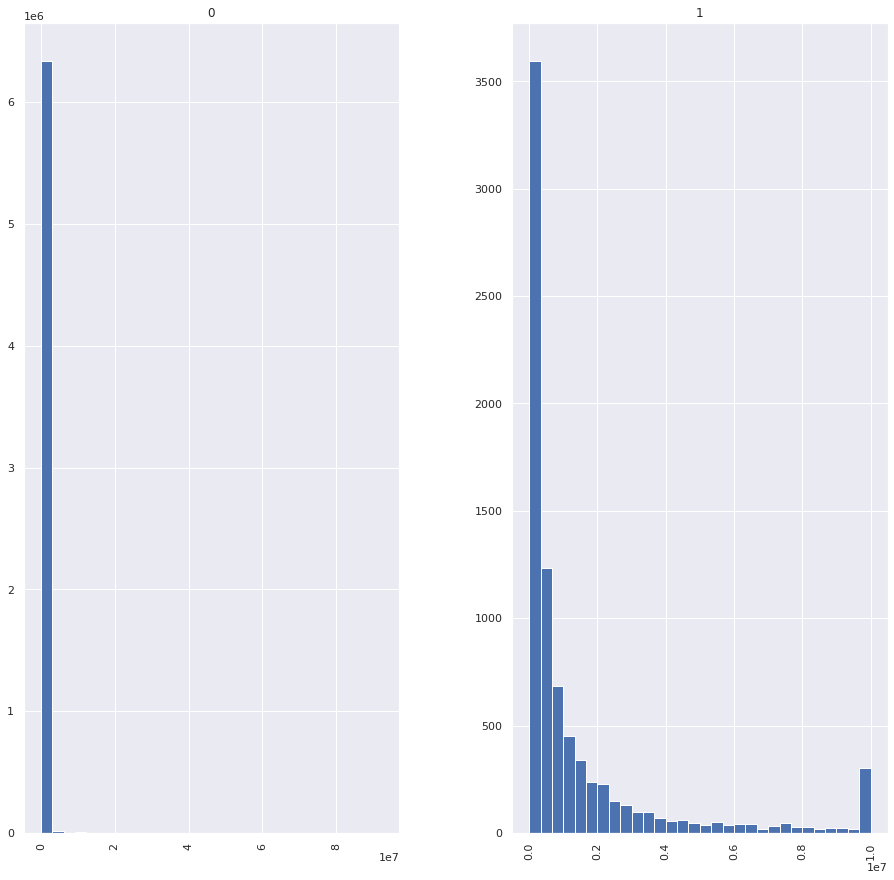

oldbalanceOrg


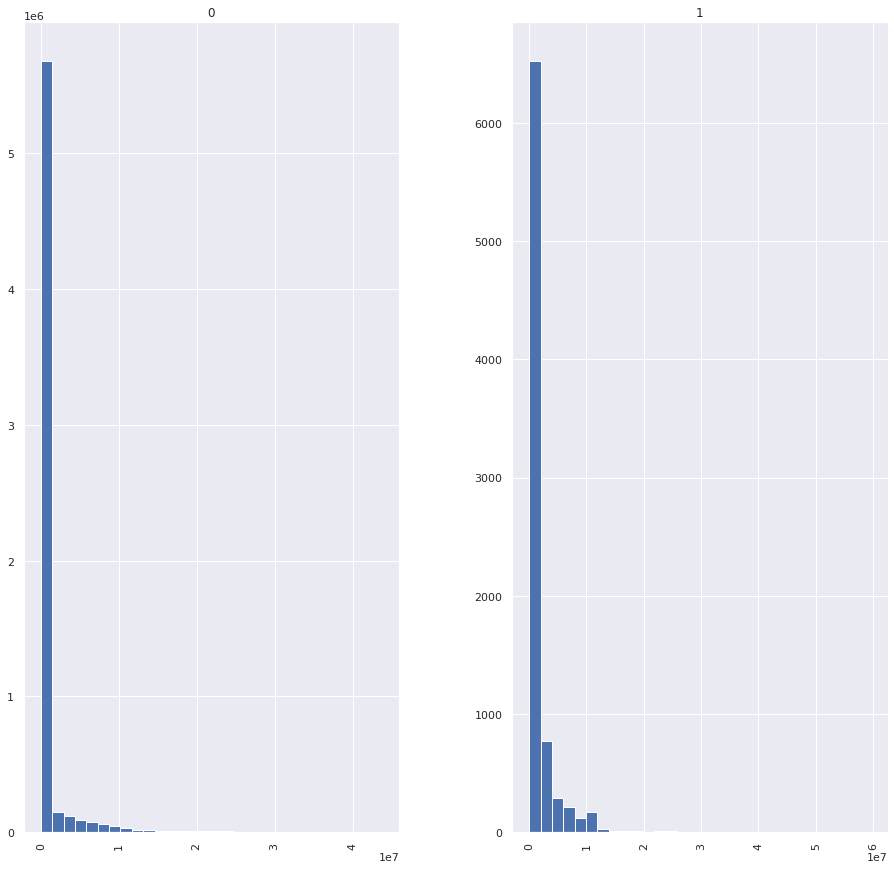

newbalanceOrig


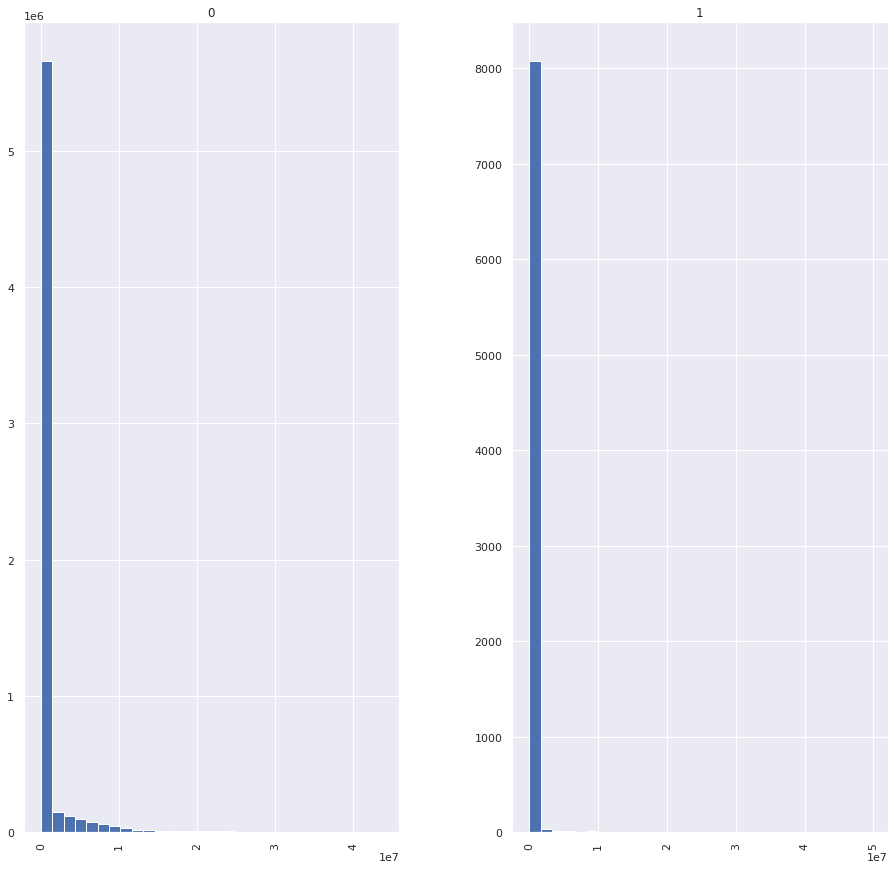

oldbalanceDest


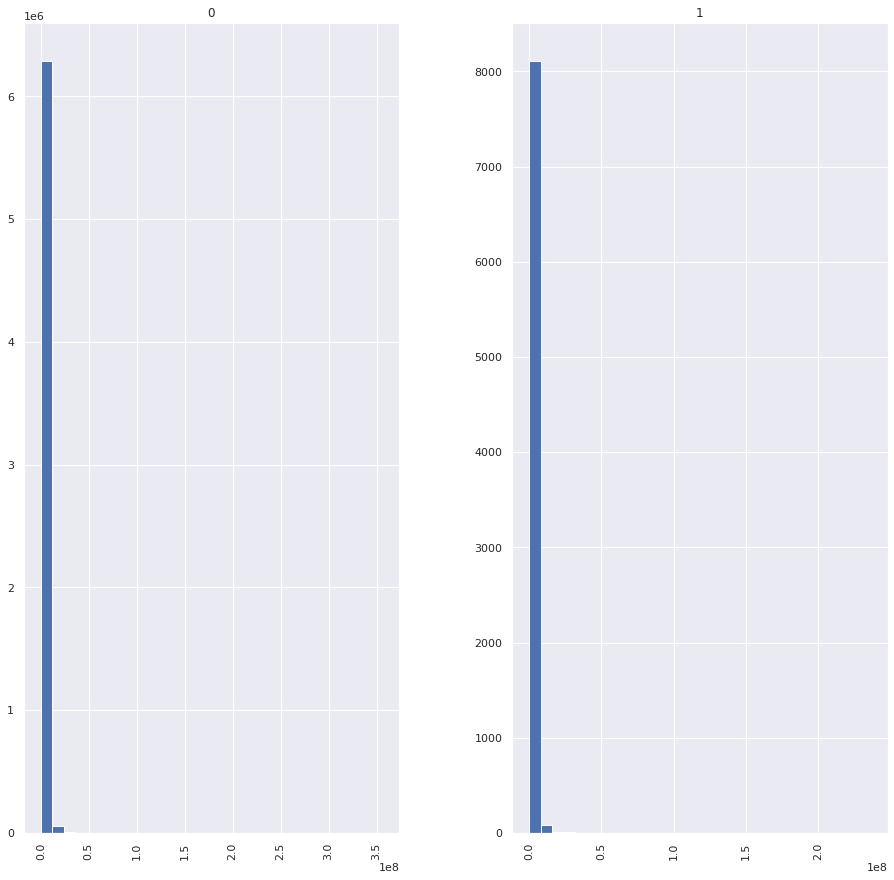

newbalanceDest


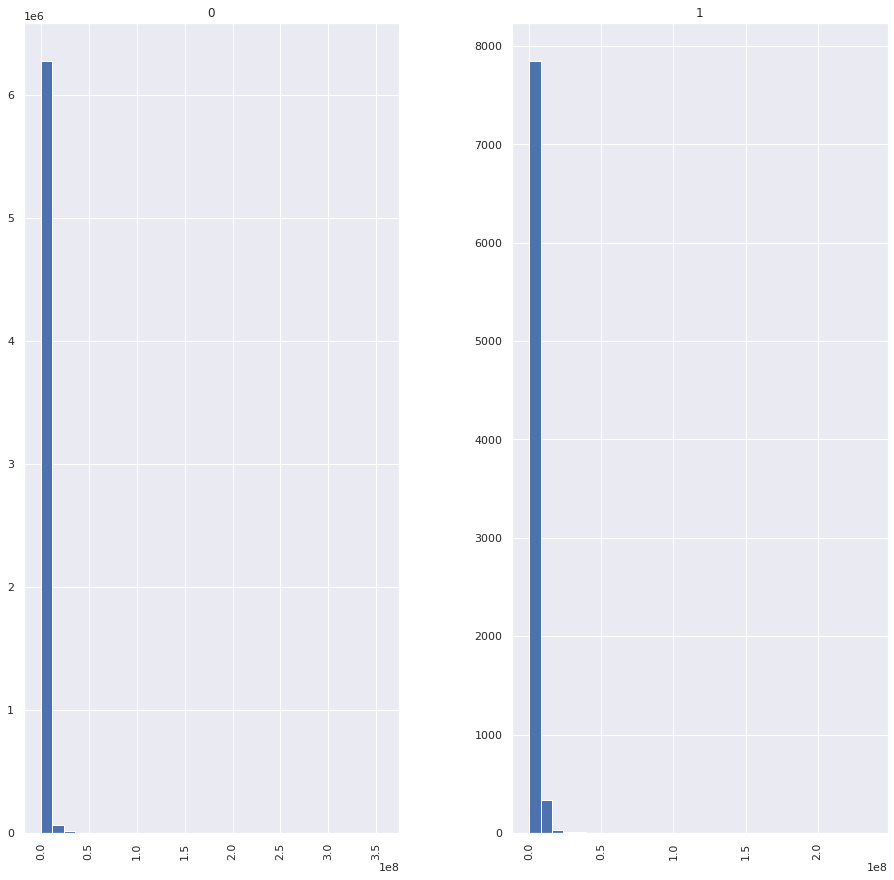

In [50]:
# Histogram
for column in df[numeric_features].columns:    
    print(column)
    hist = df[column].hist(by=df[y_column], bins=30)
    plt.show()

### Scaler

In [51]:
# numeric feature: scaling
scaler = MinMaxScaler()
transformed_data = scaler.fit_transform(df[numeric_features])

In [52]:
transformed_data

array([[0.00000000e+00, 1.06437179e-04, 2.85534757e-03, 3.23275647e-03,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 2.01662565e-05, 3.56616357e-04, 3.90938877e-04,
        0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.95790998e-06, 3.03767521e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 6.82716643e-02, 1.05922716e-01, 0.00000000e+00,
        1.92375796e-04, 1.79120417e-02],
       [1.00000000e+00, 9.19463216e-03, 1.42653679e-02, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.19463216e-03, 1.42653679e-02, 0.00000000e+00,
        1.82859791e-02, 2.06640365e-02]])

In [53]:
transformed_df = pd.DataFrame(transformed_data)
transformed_df

,0,1,2,3,4,5
0,0.0,0.000106,0.002855,0.003233,0.000000,0.000000
1,0.0,0.000020,0.000357,0.000391,0.000000,0.000000
2,0.0,0.000002,0.000003,0.000000,0.000000,0.000000
3,0.0,0.000002,0.000003,0.000000,0.000059,0.000000
4,0.0,0.000126,0.000697,0.000603,0.000000,0.000000
...,...,...,...,...,...,...
6362615,1.0,0.003674,0.005701,0.000000,0.000000,0.000954
6362616,1.0,0.068272,0.105923,0.000000,0.000000,0.000000
6362617,1.0,0.068272,0.105923,0.000000,0.000192,0.017912
6362618,1.0,0.009195,0.014265,0.000000,0.000000,0.000000


### One Hot encoding

In [54]:
# categorical feature: one-hot encoding
df[['type']].head(10)

,type
0,PAYMENT
1,PAYMENT
2,TRANSFER
3,CASH_OUT
4,PAYMENT
5,PAYMENT
6,PAYMENT
7,PAYMENT
8,PAYMENT
9,DEBIT


In [55]:
one_hot = pd.get_dummies(df['type'])
one_hot.head(10)

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,1,0,0


In [58]:
# combine original + numeric + categorical features
combined_df = pd.concat([df, transformed_df, one_hot], axis = 1)

In [59]:
combined_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,...,1,2,3,4,5,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,...,0.000106,0.002855,0.003233,0.000000,0.000000,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,...,0.000020,0.000357,0.000391,0.000000,0.000000,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,...,0.000002,0.000003,0.000000,0.000000,0.000000,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,...,0.000002,0.000003,0.000000,0.000059,0.000000,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,...,0.000126,0.000697,0.000603,0.000000,0.000000,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,...,0.003674,0.005701,0.000000,0.000000,0.000954,0,1,0,0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,...,0.068272,0.105923,0.000000,0.000000,0.000000,0,0,0,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,...,0.068272,0.105923,0.000000,0.000192,0.017912,0,1,0,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,...,0.009195,0.014265,0.000000,0.000000,0.000000,0,0,0,0,1
